In [1]:
# Importing libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import metrics

In [2]:
#function for merging left and right dataframe
def merge(left, right, name ):
    pvs= pd.concat([left, right], axis=1)
    length= len(left)

    # Renaming labels
    pvs.columns = [
    'timestamp', 'acc_x_dashboard_l', 'acc_y_dashboard_l', 'acc_z_dashboard_l',
    'acc_x_above_suspension_l', 'acc_y_above_suspension_l', 'acc_z_above_suspension_l', 
    'acc_x_below_suspension_l', 'acc_y_below_suspension_l', 'acc_z_below_suspension_l', 
    'gyro_x_dashboard_l', 'gyro_y_dashboard_l', 'gyro_z_dashboard_l', 'gyro_x_above_suspension_l', 
    'gyro_y_above_suspension_l', 'gyro_z_above_suspension_l', 'gyro_x_below_suspension_l', 
    'gyro_y_below_suspension_l', 'gyro_z_below_suspension_l', 'mag_x_dashboard_l', 'mag_y_dashboard_l', 
    'mag_z_dashboard_l', 'mag_x_above_suspension_l', 'mag_y_above_suspension_l', 'mag_z_above_suspension_l', 
    'temp_dashboard_l', 'temp_above_suspension_l', 'temp_below_suspension_l', 'timestamp_gps', 
    'latitude', 'longitude', 'speed', 'timestamp', 'acc_x_dashboard_r', 'acc_y_dashboard_r', 
    'acc_z_dashboard_r', 'acc_x_above_suspension_r', 'acc_y_above_suspension_r', 
    'acc_z_above_suspension_r', 'acc_x_below_suspension_r', 'acc_y_below_suspension_r', 
    'acc_z_below_suspension_r', 'gyro_x_dashboard_r', 'gyro_y_dashboard_r', 'gyro_z_dashboard_r', 
    'gyro_x_above_suspension_r', 'gyro_y_above_suspension_r', 'gyro_z_above_suspension_r', 
    'gyro_x_below_suspension_r', 'gyro_y_below_suspension_r', 'gyro_z_below_suspension_r', 
    'mag_x_dashboard_r', 'mag_y_dashboard_r', 'mag_z_dashboard_r', 'mag_x_above_suspension_r', 
    'mag_y_above_suspension_r', 'mag_z_above_suspension_r', 'temp_dashboard_r', 'temp_above_suspension_r', 
    'temp_below_suspension_r', 'timestamp_gps', 'latitude', 'longitude', 'speed'
    ]
    

    # Remove duplicate columns (those with the same name, e.g., 'timestamp_gps', 'latitude', etc.)
    pvs_removed = pvs.loc[:, ~pvs.columns.duplicated()]

    # Columns to keep. We try these first
    to_keep=["timestamp",
             "acc_x_dashboard_l",
             "acc_y_dashboard_l",
             "acc_z_dashboard_l",
             "speed",
             "gyro_x_dashboard_l",
             "gyro_y_dashboard_l",
             "gyro_z_dashboard_l"
            ]
    
    pvs_removed=pvs_removed[to_keep]

    #create the driver column ( target )
    if name in ("pvs1_gps_mpu","pvs2_gps_mpu","pvs3_gps_mpu"):
        pvs_removed['Driver'] = 1
    elif name in ("pvs4_gps_mpu","pvs5_gps_mpu","pvs6_gps_mpu"):
        pvs_removed['Driver'] = 2
    else: 
        pvs_removed['Driver'] = 3
        
    return pvs_removed


In [3]:
# Importing datasets
filepaths_left={
    "pvs1_gps_mpu" : r"archive/PVS 1/dataset_gps_mpu_left.csv",
    "pvs2_gps_mpu" : r"archive/PVS 2/dataset_gps_mpu_left.csv",
    "pvs3_gps_mpu" : r"archive/PVS 3/dataset_gps_mpu_left.csv",
    "pvs4_gps_mpu" : r"archive/PVS 4/dataset_gps_mpu_left.csv",
    "pvs5_gps_mpu" : r"archive/PVS 5/dataset_gps_mpu_left.csv",
    "pvs6_gps_mpu" : r"archive/PVS 6/dataset_gps_mpu_left.csv",
    "pvs7_gps_mpu" : r"archive/PVS 7/dataset_gps_mpu_left.csv",
    "pvs8_gps_mpu" : r"archive/PVS 8/dataset_gps_mpu_left.csv",
    "pvs9_gps_mpu" : r"archive/PVS 9/dataset_gps_mpu_left.csv"
}

filepaths_right={
    "pvs1_gps_mpu" : r"archive/PVS 1/dataset_gps_mpu_right.csv",
    "pvs2_gps_mpu" : r"archive/PVS 2/dataset_gps_mpu_right.csv",
    "pvs3_gps_mpu" : r"archive/PVS 3/dataset_gps_mpu_right.csv",
    "pvs4_gps_mpu" : r"archive/PVS 4/dataset_gps_mpu_right.csv",
    "pvs5_gps_mpu" : r"archive/PVS 5/dataset_gps_mpu_right.csv",
    "pvs6_gps_mpu" : r"archive/PVS 6/dataset_gps_mpu_right.csv",
    "pvs7_gps_mpu" : r"archive/PVS 7/dataset_gps_mpu_right.csv",
    "pvs8_gps_mpu" : r"archive/PVS 8/dataset_gps_mpu_right.csv",
    "pvs9_gps_mpu" : r"archive/PVS 9/dataset_gps_mpu_right.csv"


}

# Left and right corresponds to sensordata from either side of the cars
datasets_left = {name:pd.read_csv(path) for name,path in filepaths_left.items()}
datasets_right = {name:pd.read_csv(path) for name,path in filepaths_right.items()}

datasets = {name: merge(datasets_left[name],datasets_right[name], name) for name in datasets_right.keys()}

print(type(datasets))

<class 'dict'>


Length of speed list for pvs1_gps_mpu :  144036
Length of speed list for pvs2_gps_mpu :  124684
Length of speed list for pvs3_gps_mpu :  105816
Length of speed list for pvs4_gps_mpu :  132492
Length of speed list for pvs5_gps_mpu :  133877
Length of speed list for pvs6_gps_mpu :  96279
Length of speed list for pvs7_gps_mpu :  128548
Length of speed list for pvs8_gps_mpu :  123618
Length of speed list for pvs9_gps_mpu :  91555


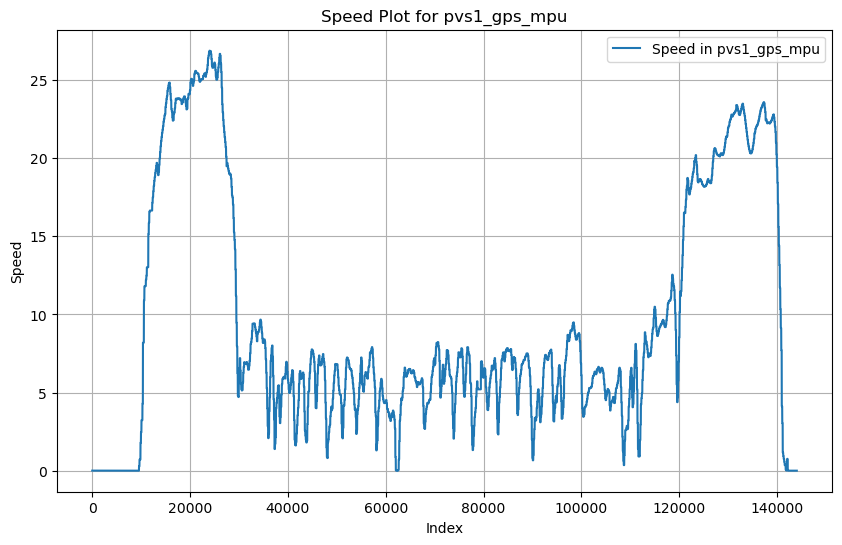

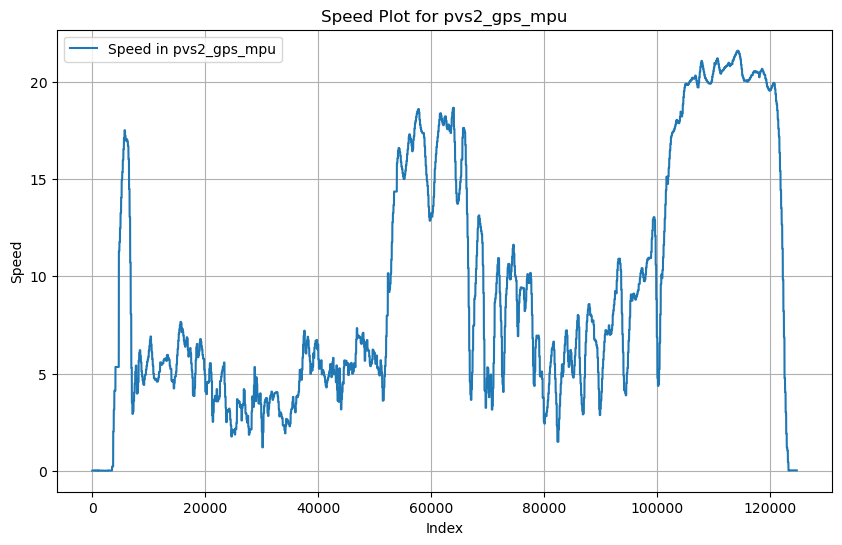

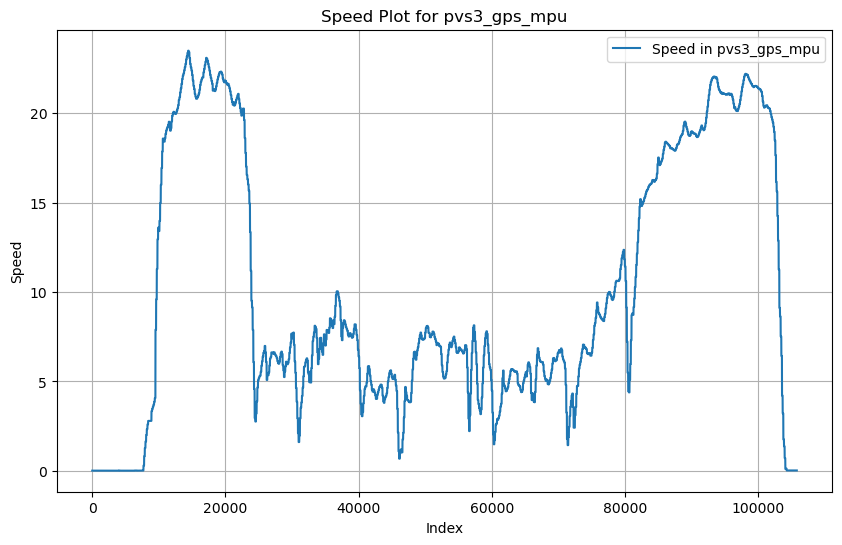

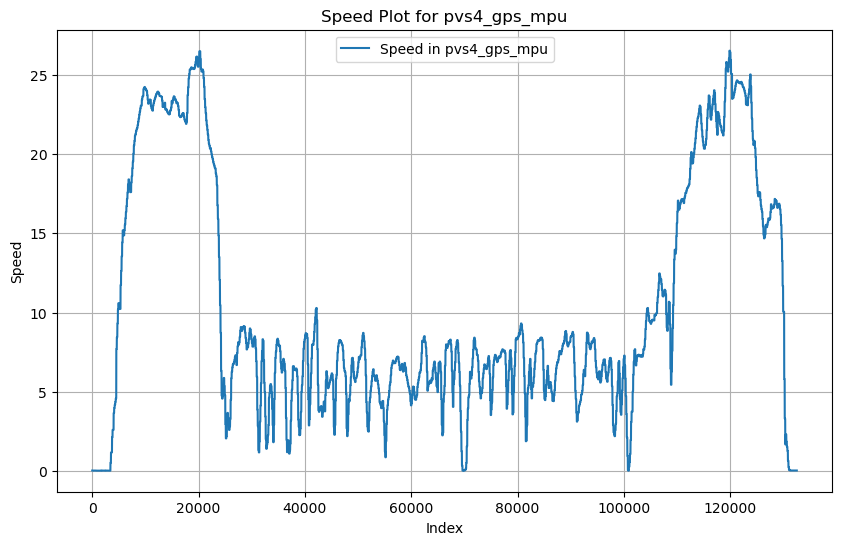

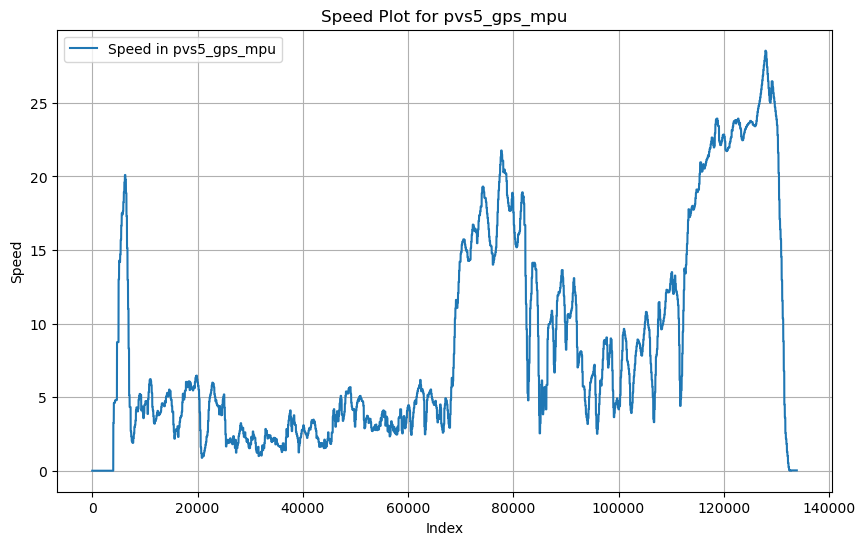

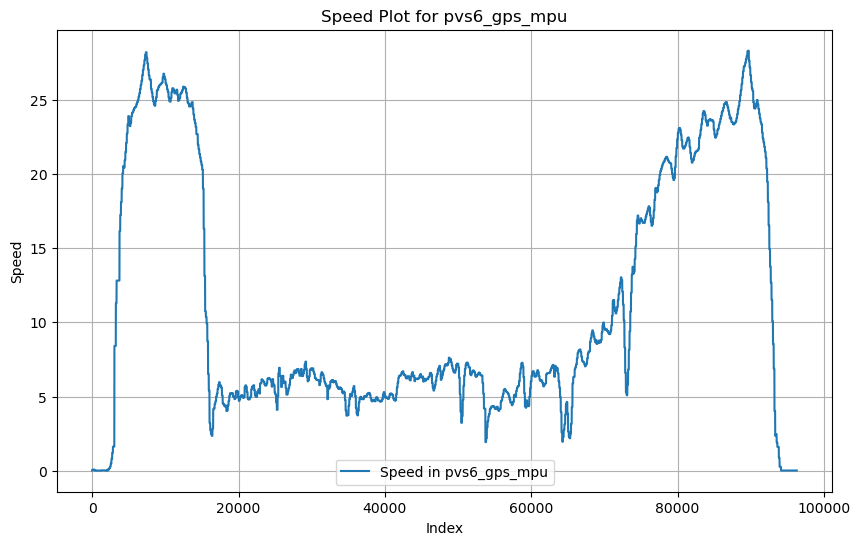

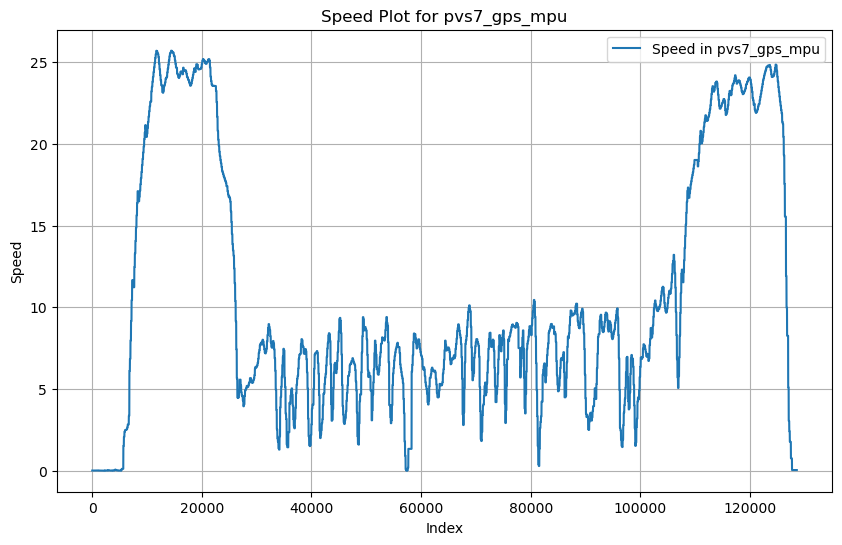

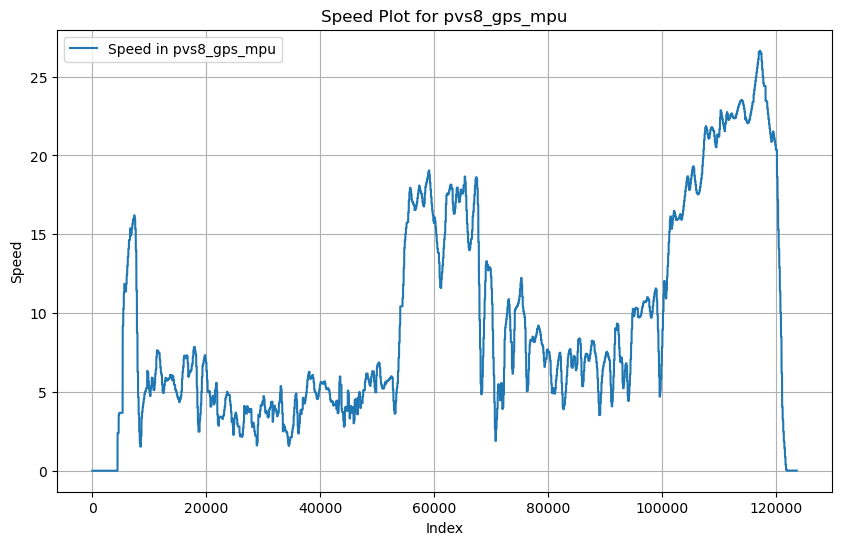

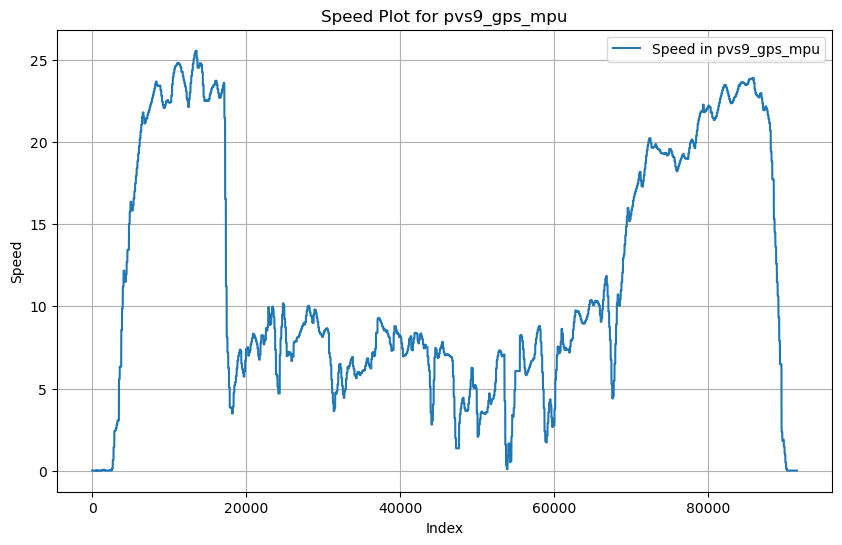

In [4]:
for key, index in datasets.items():
    print("Length of speed list for", key, ": ", len(datasets[key]['speed']))

for key, df in datasets.items():
    plt.figure(figsize=(10, 6))  # Create a new figure for each dataset
    plt.plot(df['speed'], label=f'Speed in {key}')
    plt.title(f'Speed Plot for {key}')
    plt.xlabel('Index')
    plt.ylabel('Speed')
    plt.legend()
    plt.grid(True)
    plt.show()

In [5]:
def remove_zero_values(dfs):

    non_zero_indices = {}
    threshold = 0.1  # Define the threshold to detect non-zero speeds

    for key, df in dfs.items():

        first_non_zero_index = (df['speed'].abs() > threshold).idxmax()
        last_non_zero_index = (df['speed'][::-1].abs() > threshold).idxmax()

        non_zero_indices[key] = (first_non_zero_index, last_non_zero_index)

    print(non_zero_indices)

    # Iterate through each dataset and its respective non-zero index
    for key, index in non_zero_indices.items():
        dfs[key] = dfs[key].iloc[index[0]:index[1]].reset_index(drop=True)  # Remove rows up to the index and reset index

    return dfs

truncated_datasets = remove_zero_values(datasets)

print(type(truncated_datasets))

{'pvs1_gps_mpu': (9544, 142143), 'pvs2_gps_mpu': (3494, 123193), 'pvs3_gps_mpu': (7682, 104281), 'pvs4_gps_mpu': (3407, 131006), 'pvs5_gps_mpu': (3986, 132385), 'pvs6_gps_mpu': (2214, 94113), 'pvs7_gps_mpu': (5358, 127657), 'pvs8_gps_mpu': (4427, 121726), 'pvs9_gps_mpu': (2560, 90259)}
<class 'dict'>


Length of speed list for pvs1_gps_mpu :  132599
Length of speed list for pvs2_gps_mpu :  119699
Length of speed list for pvs3_gps_mpu :  96599
Length of speed list for pvs4_gps_mpu :  127599
Length of speed list for pvs5_gps_mpu :  128399
Length of speed list for pvs6_gps_mpu :  91899
Length of speed list for pvs7_gps_mpu :  122299
Length of speed list for pvs8_gps_mpu :  117299
Length of speed list for pvs9_gps_mpu :  87699


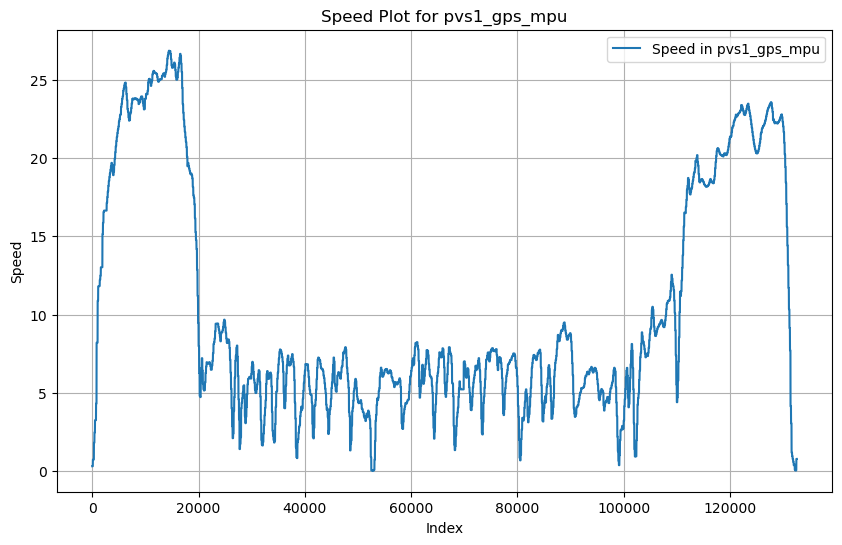

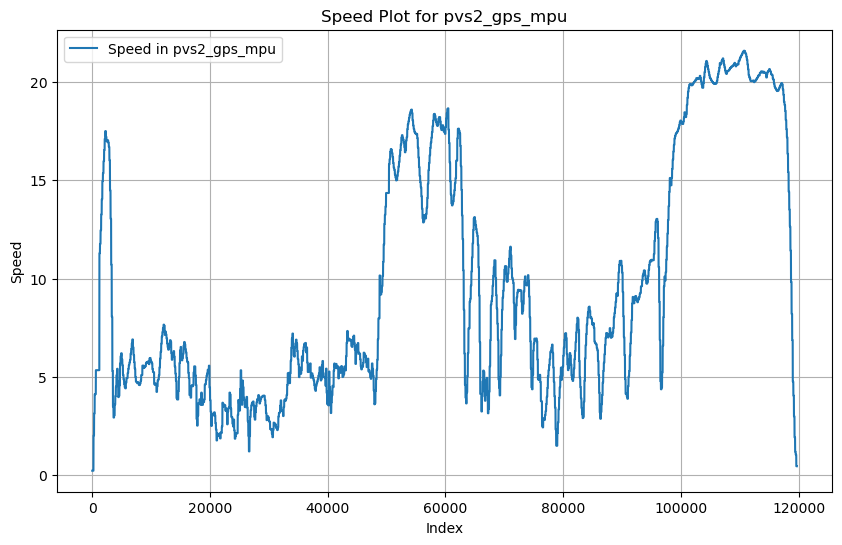

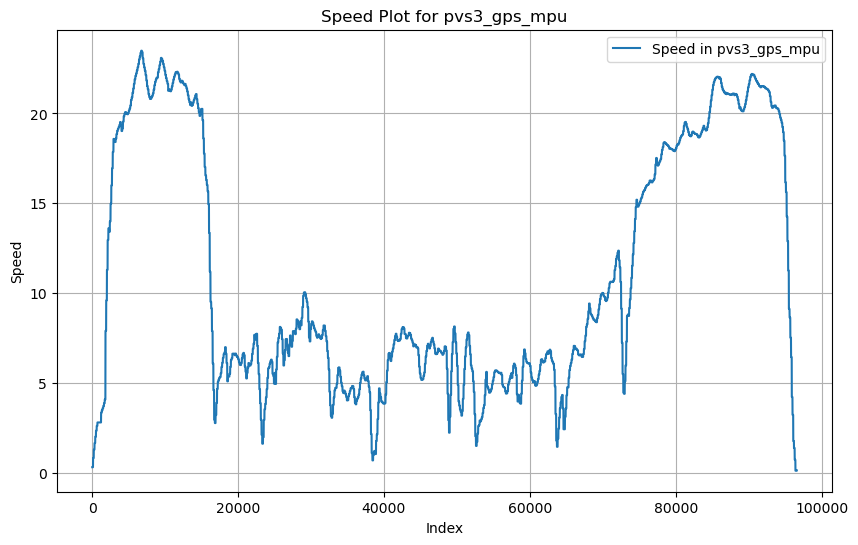

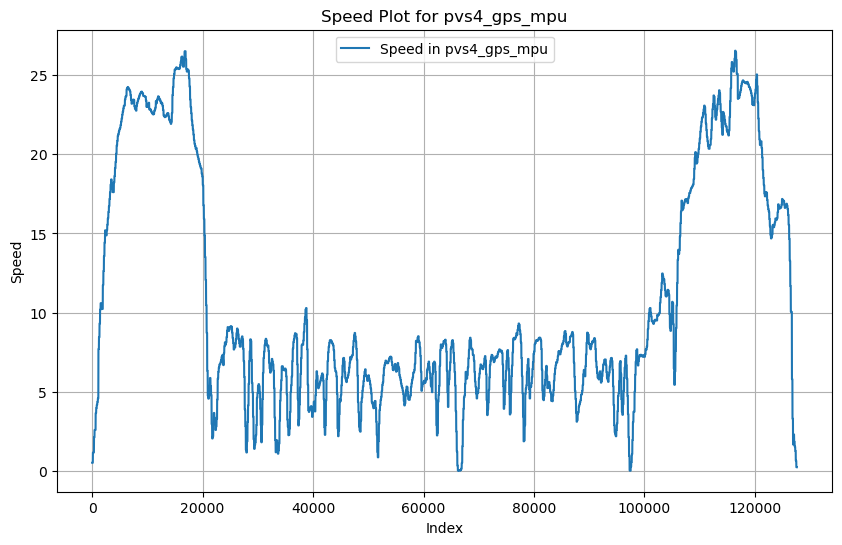

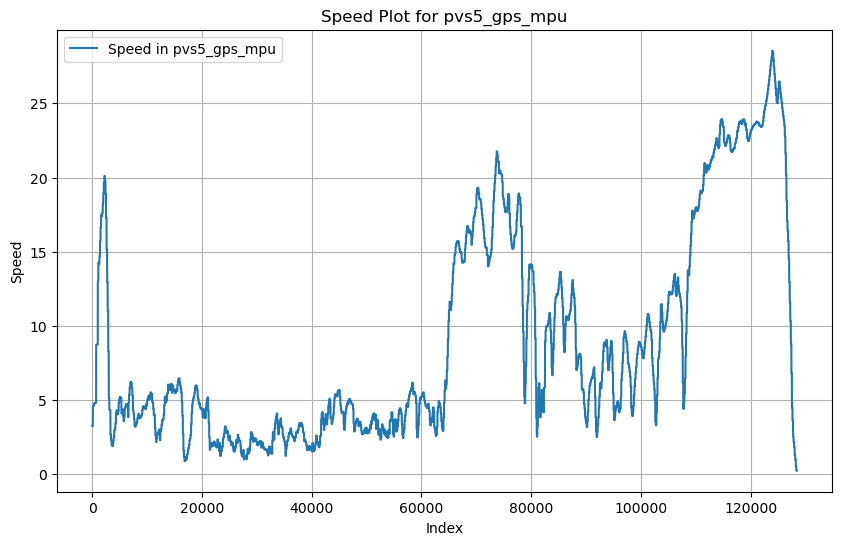

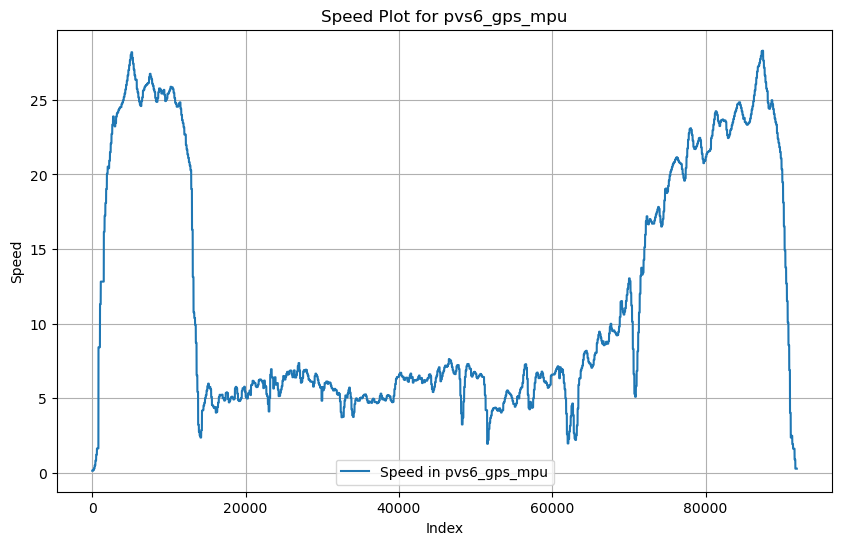

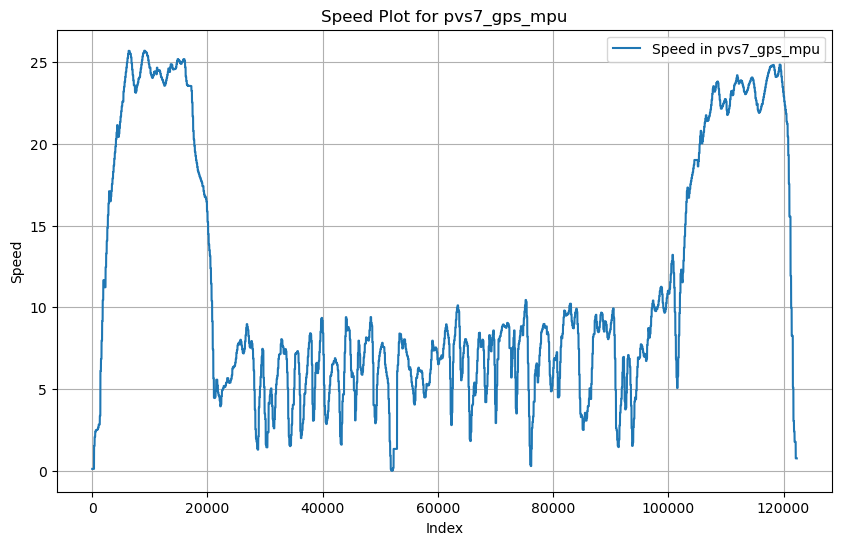

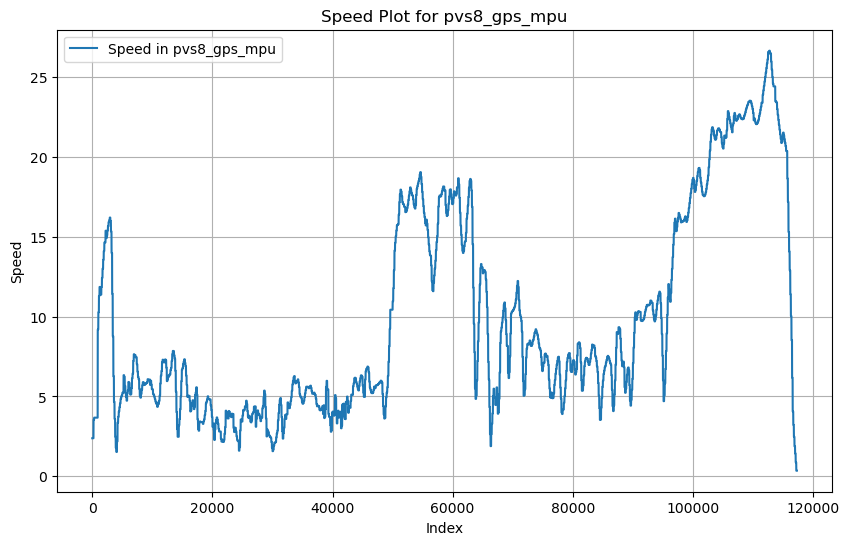

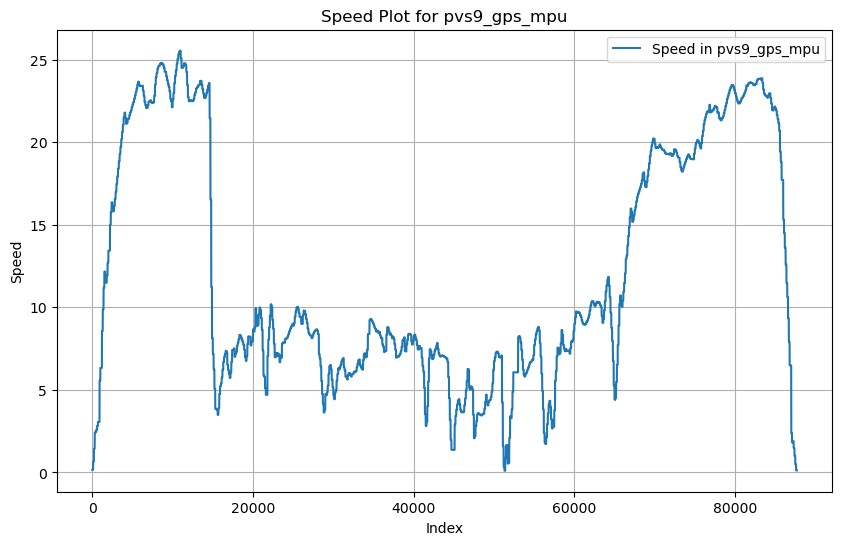

In [10]:
for key, index in truncated_datasets.items():
    print("Length of speed list for", key, ": ", len(truncated_datasets[key]['speed']))

for key, df in truncated_datasets.items():
    plt.figure(figsize=(10, 6))  # Create a new figure for each dataset
    plt.plot(df['speed'], label=f'Speed in {key}')
    plt.title(f'Speed Plot for {key}')
    plt.xlabel('Index')
    plt.ylabel('Speed')
    plt.legend()
    plt.grid(True)
    plt.show()

In [11]:
def equalize_dfs(dfs):

    # Split DataFrames into three routes
    dfs_keys = list(dfs.keys())  # Get all keys in the dictionary
    first_route_keys = dfs_keys[:3]  # First three keys for the first route
    second_route_keys = dfs_keys[3:6]  # Next three keys for the second route
    third_route_keys = dfs_keys[6:]  # Last three keys for the third route

    # Calculate the minimum lengths for each route
    min_length_first_route = min(len(dfs[key]) for key in first_route_keys)
    min_length_second_route = min(len(dfs[key]) for key in second_route_keys)
    min_length_third_route = min(len(dfs[key]) for key in third_route_keys)

    print(f"Shortest length in the first route: {min_length_first_route}")
    print(f"Shortest length in the second route: {min_length_second_route}")
    print(f"Shortest length in the third route: {min_length_third_route}")

    # Truncate all DataFrames in each route to the respective minimum length
    for key in first_route_keys:
        dfs[key] = dfs[key].iloc[:min_length_first_route].reset_index(drop=True)

    for key in second_route_keys:
        dfs[key] = dfs[key].iloc[:min_length_second_route].reset_index(drop=True)

    for key in third_route_keys:
        dfs[key] = dfs[key].iloc[:min_length_third_route].reset_index(drop=True)

    return dfs

equalized_datasets = equalize_dfs(truncated_datasets)    

print(type(equalized_datasets))


Shortest length in the first route: 96599
Shortest length in the second route: 91899
Shortest length in the third route: 87699
<class 'dict'>


Length of speed list for pvs1_gps_mpu :  96599
Length of speed list for pvs2_gps_mpu :  96599
Length of speed list for pvs3_gps_mpu :  96599
Length of speed list for pvs4_gps_mpu :  91899
Length of speed list for pvs5_gps_mpu :  91899
Length of speed list for pvs6_gps_mpu :  91899
Length of speed list for pvs7_gps_mpu :  87699
Length of speed list for pvs8_gps_mpu :  87699
Length of speed list for pvs9_gps_mpu :  87699


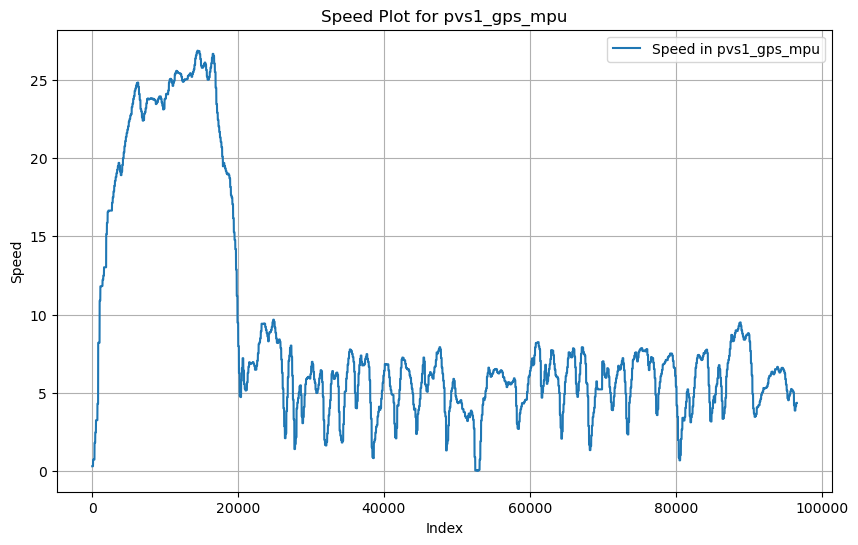

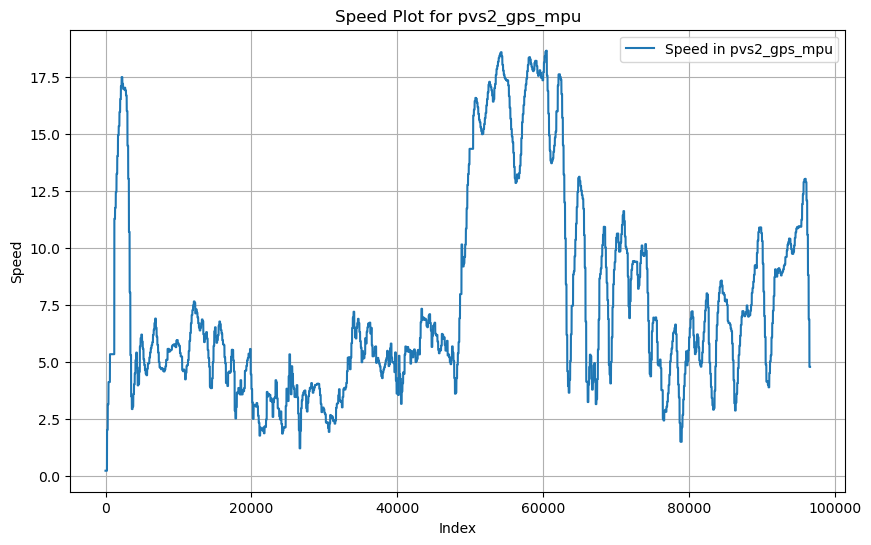

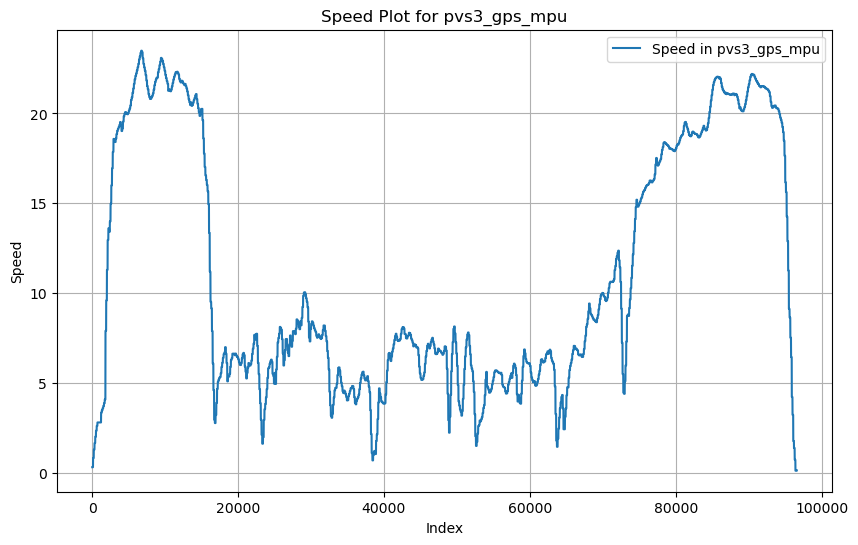

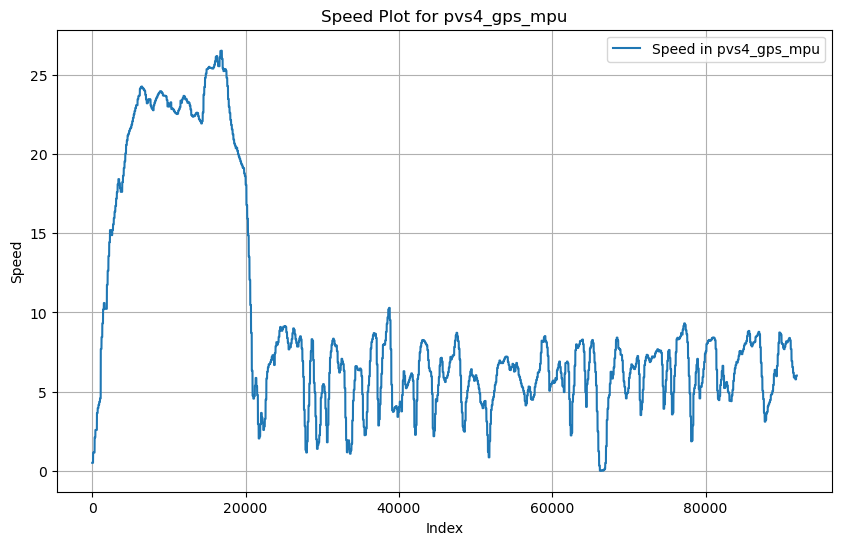

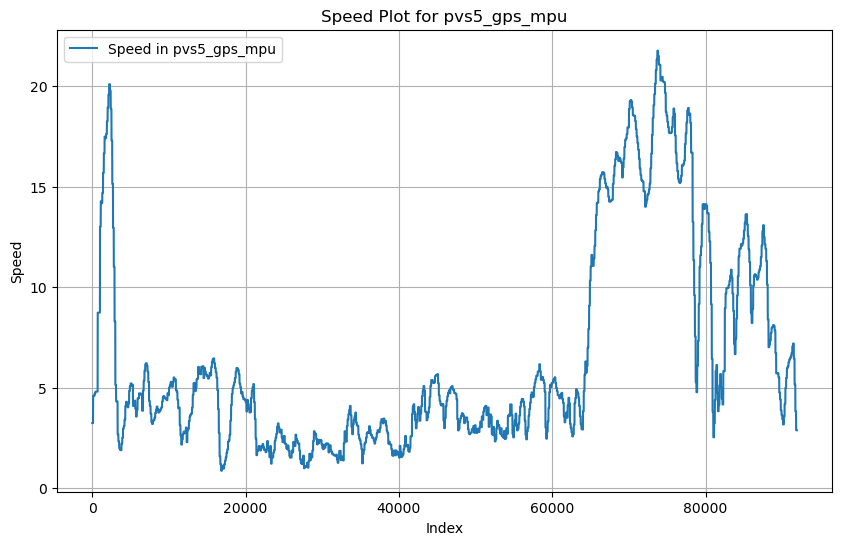

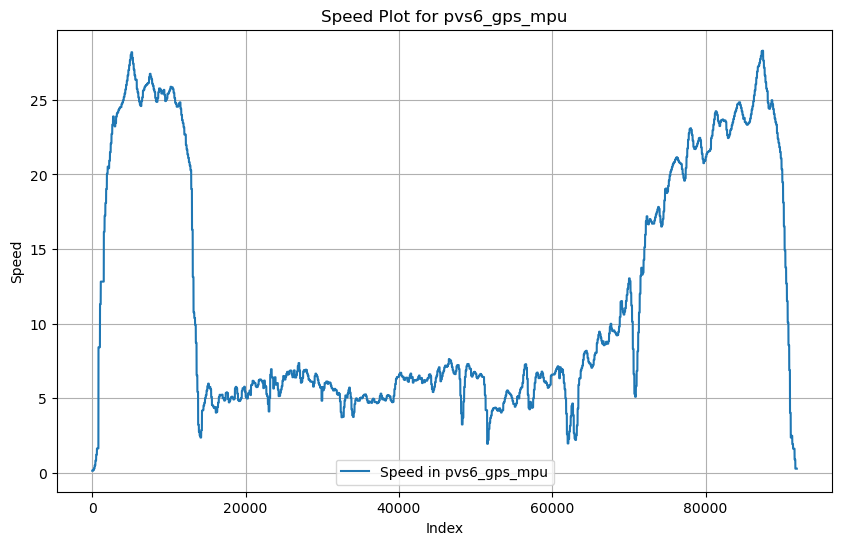

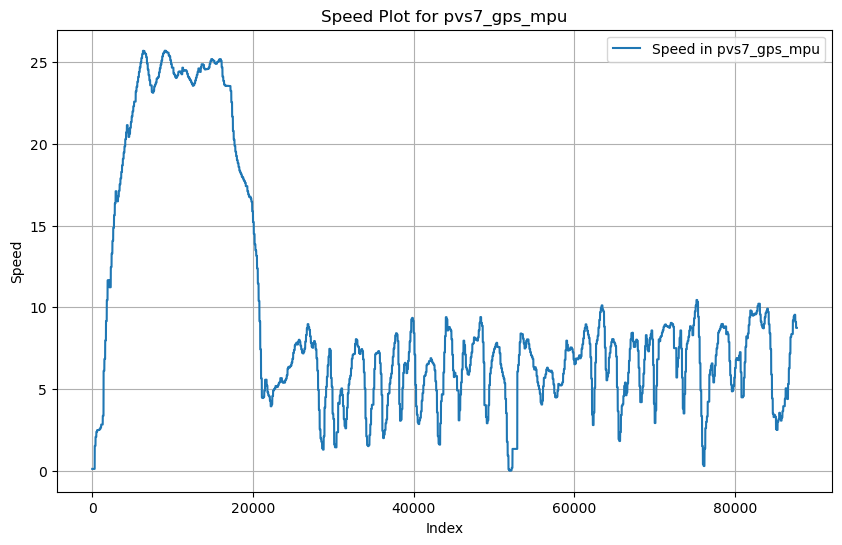

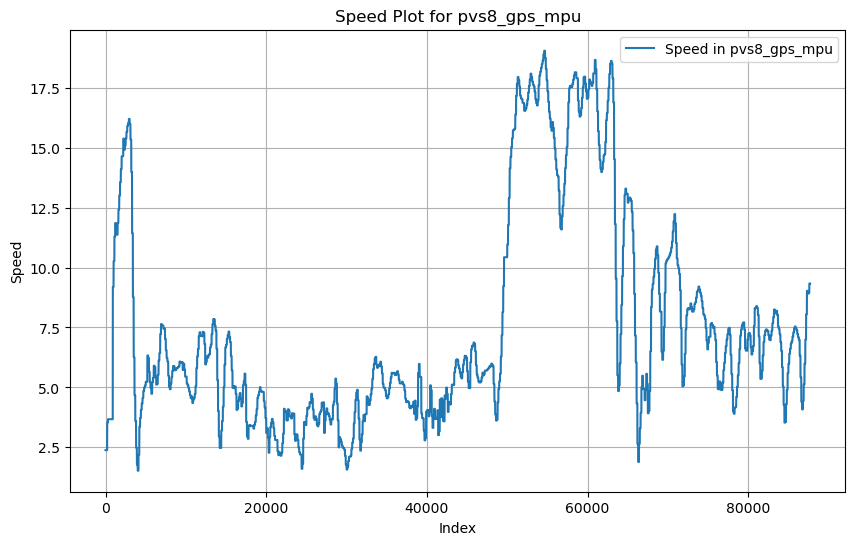

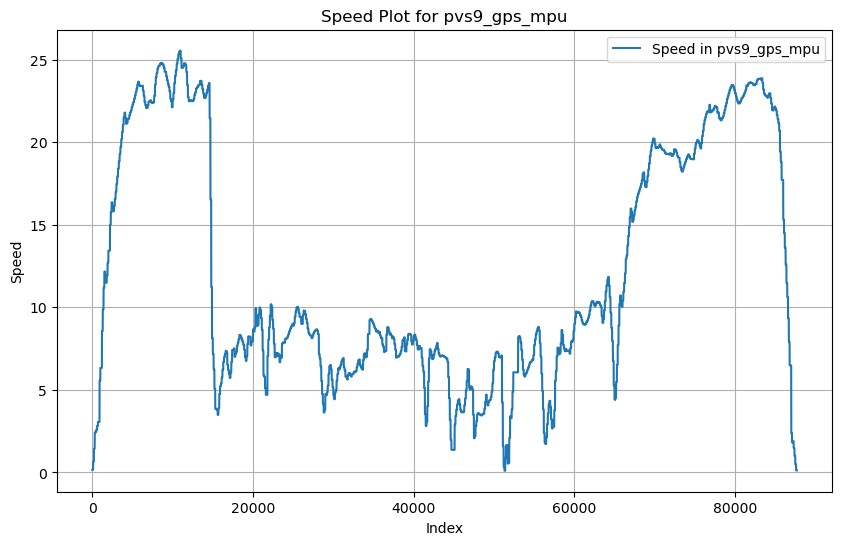

In [14]:
for key, index in equalized_datasets.items():
    print("Length of speed list for", key, ": ", len(equalized_datasets[key]['speed']))

for key, df in equalized_datasets.items():
    plt.figure(figsize=(10, 6))  # Create a new figure for each dataset
    plt.plot(df['speed'], label=f'Speed in {key}')
    plt.title(f'Speed Plot for {key}')
    plt.xlabel('Index')
    plt.ylabel('Speed')
    plt.legend()
    plt.grid(True)
    plt.show()

In [21]:
print(type(equalized_datasets))


<class 'int'>
